In [1]:
import torchvision
import torch.nn as nn
from torchvision.utils import save_image, make_grid
import json
# from src.model import Net
import os
import torch
import matplotlib.pyplot as plt
import numpy as np

/home/xiaochen/anaconda3/envs/IFv2/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
os.chdir("/home/xiaochen/kewen/IF_project")

In [3]:

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                        download=True)
                                

In [4]:
def _subsample_by_classes(all_examples, labels, num_per_class=None):
    if num_per_class is None:
        return all_examples

    examples = {label: [] for label in labels}
    for example in all_examples:
        if example[1] in labels:
            examples[example[1]].append(example)

    picked_examples = []
    for label in labels:
        examples_with_label = examples[label][:num_per_class[label]]
        picked_examples.extend(examples_with_label)

        print(f'number of examples with label \'{label}\': '
            f'{len(examples_with_label)}')

    return picked_examples

In [5]:
trainset_sampled = _subsample_by_classes(trainset, [0, 1,2,3,4,5,6,7,8,9], [100]*10)

number of examples with label '0': 100
number of examples with label '1': 100
number of examples with label '2': 100
number of examples with label '3': 100
number of examples with label '4': 100
number of examples with label '5': 100
number of examples with label '6': 100
number of examples with label '7': 100
number of examples with label '8': 100
number of examples with label '9': 100


In [6]:
# JSON file
groundTruthPath = 'outputs/mnist_good/classAll100Each/Percy_mnist_devId_9_MNIST_1_100Each.json'
with open (groundTruthPath, "r") as f:
     data_groundtruth = json.loads(f.read())


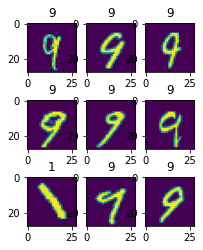

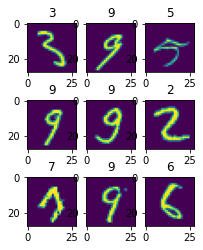

In [7]:
fig = plt.figure(figsize=(3, 4))
for i in range(1,10):
    fig.add_subplot(3,3,i)
    plt.imshow(trainset_sampled[data_groundtruth['helpful'][i]][0])
    plt.title(trainset_sampled[data_groundtruth['helpful'][i]][1])
fig = plt.figure(figsize=(3, 4))
for i in range(1,10):
    fig.add_subplot(3,3,i)
    plt.imshow(trainset_sampled[data_groundtruth['harmful'][i]][0])
    plt.title(trainset_sampled[data_groundtruth['harmful'][i]][1])

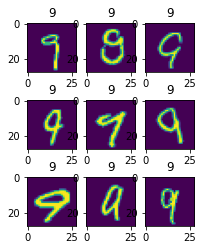

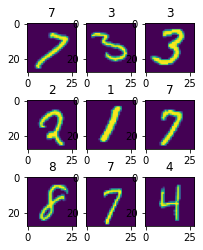

In [8]:
target_path = 'outputs/mnist_good/classAll100Each/IF_mnist_devId_9_MNIST_1_epoch_100_classAll100Each.json'
# JSON file
with open (target_path, "r") as f:
     data_target = json.loads(f.read())
fig = plt.figure(figsize=(3, 4))
for i in range(1,10):
    fig.add_subplot(3,3,i)
    plt.imshow(trainset_sampled[data_target['helpful'][i]][0])
    plt.title(trainset_sampled[data_target['helpful'][i]][1])
fig = plt.figure(figsize=(3, 4))
for i in range(1,10):
    fig.add_subplot(3,3,i)
    plt.imshow(trainset_sampled[data_target['harmful'][i]][0])
    plt.title(trainset_sampled[data_target['harmful'][i]][1])

In [9]:
y =  np.array(data_groundtruth['influence'])
x = np.array(data_target['influence'])
Correlation = round(np.corrcoef(x,y)[0,1],3)

Text(0.5, 1.0, 'correlation 0.344')

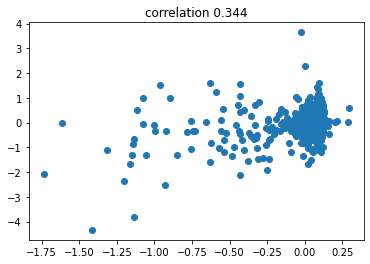

In [10]:
plt.scatter(x,y)
plt.title(f"correlation {Correlation}")

In [23]:
target_path = 'outputs/mnist_good/classAll100Each/gradient_IF_mnist_devId_9_MNIST_1_epoch_0_bz10000.json'
# JSON file
with open (target_path, "r") as f:
     data_target = json.loads(f.read())

Text(0.5, 1.0, 'correlation 0.313')

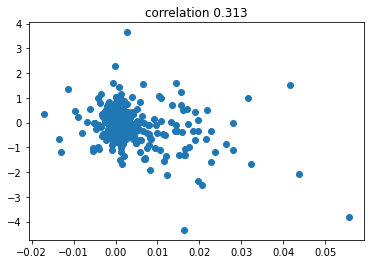

In [24]:
y =  np.array(data_groundtruth['influence'])
x = np.array(data_target['influence'])
Correlation = round(np.corrcoef(x,-y)[0,1],3)
plt.scatter(x,y)
plt.title(f"correlation {Correlation}")

Text(0.5, 1.0, 'correlation 0.313')

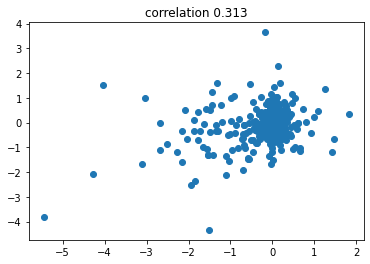

In [15]:
target_path = 'outputs/mnist_good/classAll100Each/Identity_mnist_devId_9_MNIST_1_100Each.json'
# JSON file
with open (target_path, "r") as f:
     data_target = json.loads(f.read())
y =  np.array(data_groundtruth['influence'])
x = np.array(data_target['influence'])
Correlation = round(np.corrcoef(x,y)[0,1],3)
plt.scatter(x,y)
plt.title(f"correlation {Correlation}")